In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [ ]:
main_df = pd.DataFrame(columns = ['name', 'gender', 'population', 'year'])
start_year = 1880 
while start_year <= 2021: 
  file_name = "yob" + str(start_year) 
  
  with open(file_name + ".txt", 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open(file_name + ".csv", 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('name', 'gender', 'population'))
        writer.writerows(lines)


  df = pd.read_csv(file_name + ".csv")
  df["year"] = start_year #add the column year to the dataframe
  df.to_csv(file_name + "t" + ".csv") #save as a new csv file with year column
  new_df = pd.read_csv(file_name + "t" + ".csv") #open the csv file with year
  main_df = pd.concat([main_df,new_df]) #concat to main_df
  if start_year == 2021:
    main_df.to_csv("final.csv") #export main_df to csv file when done
  start_year += 1

In [ ]:
df = pd.read_csv("final.csv").loc[:,["name","gender","population","year"]]
print(df.shape)
df = df.dropna() #drop na
print(df.shape)
print(df.isnull().sum())

(2052789, 4)
(2052754, 4)
name          0
gender        0
population    0
year          0
dtype: int64


In [ ]:
df = df[(df["gender"] == "F") | (df["gender"] == "M")] 
print(df.shape)
df = df[df["population"] >= 0] 
print(df.shape)
new_df = df.sort_values(["population"], ascending=False).drop_duplicates(["name"], keep='first') 
print(new_df.shape)

(2052752, 4)
(2052749, 4)
(2052749, 4)


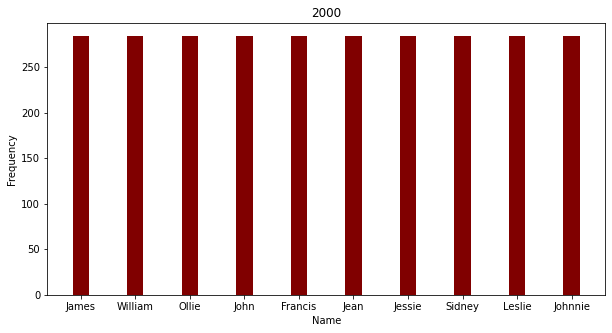

In [ ]:


user_year = "2000" #@param {type:"string"}
user_year = int(user_year)
year_df = df[(df["year"] == user_year)]
n = 10
list_10_common = df['name'].value_counts()[:n].index.tolist()
frequency = df['name'].value_counts().tolist()
frequency = frequency[:10]
fig = plt.figure(figsize = (10, 5))
plt.title(user_year)
plt.xlabel("Name")
plt.ylabel("Frequency")
plt.bar(list_10_common, frequency, color ='maroon',
        width = 0.3)

plt.show()

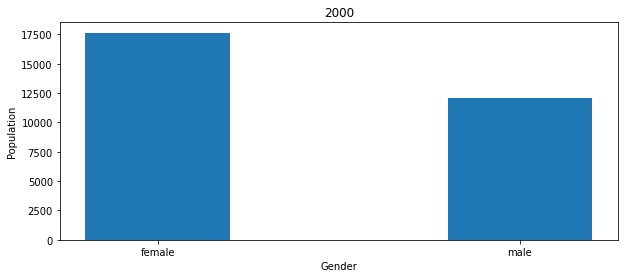

In [ ]:


user_year = "2000" #@param {type:"string"}
user_year = int(user_year)
trend_df = df[(df ["year"] == user_year)].groupby("gender").count()
list_gender = []
list_gender.append(trend_df["population"][0])
list_gender.append(trend_df["population"][1])
fig = plt.figure(figsize = (10, 4))
plt.title(user_year)
plt.xlabel("Gender")
plt.ylabel("Population")
plt.bar(["female", "male"], list_gender,
        width = 0.4)

plt.show()

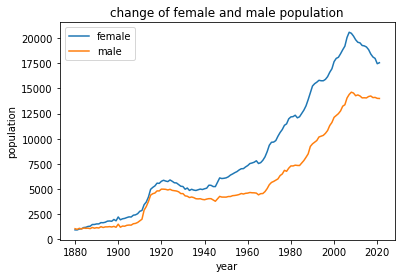

In [ ]:
m = []
f = []
x = []
start = 1880
while start < 2022:
  trend_df = df[(df ["year"] == start)].groupby("gender").count()
  f.append(trend_df["population"][0])
  m.append(trend_df["population"][1])
  x.append(start)
  start += 1

plt.plot(x, f, label = "female")
plt.plot(x, m, label = "male")
  
plt.xlabel('year')
plt.ylabel('population')
plt.title('change of female and male population')
  
plt.legend()
